<a href="https://colab.research.google.com/github/ekumar84/CNN-Image-classification/blob/main/FeedForwardNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data import random_split
import numpy as np
import matplotlib.pyplot as plt

#set seeds for reproduclibility

torch.manual_seed(1)   #Always generates the same random numbers
np.random.seed(1)





**Hyperparameters**

We define hyperparameters beforehand so that its easier to tune it later.

In [2]:
#hyperparameters

input_size = 784
hidden_size_1 = 128
hidden_size_2 = 64
num_classes = 10 #output layer
learning_rate = 0.001
batch_size = 128
num_epochs = 15

**Loading Raw Data:**

We will be training our NN on MNIST dataset for classification. MNIST dataset contains grayscale images of handwritten digits(0-9) of size 28*28.

The MNIST database contains 60,000 training images and 10,000 testing images. It’s the "Hello, World!" of image classification to compare basic models due to its small size and simplicity.


For more information you can go through:

https://docs.pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html

https://en.wikipedia.org/wiki/MNIST_database#

In [3]:
raw_train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=None)
raw_test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=None)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 502kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.54MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.73MB/s]


In [5]:
x_train_raw = raw_train_dataset.data
y_train_raw = raw_train_dataset.targets
print(x_train_raw[0].dtype)
print(y_train_raw[0].dtype)
print(raw_train_dataset.data.shape)
print(raw_train_dataset.targets.shape)
print(type(raw_train_dataset.data[0][0]))


#digits,counts = np.unique(y_train_raw, return_counts=True)
#print(digits)
#print(counts)

digits, counts = np.unique(y_train_raw, return_counts=True)
for i, j in zip(digits, counts):
    print(f'Digit: {i}, Count: {j}')

torch.uint8
torch.int64
torch.Size([60000, 28, 28])
torch.Size([60000])
<class 'torch.Tensor'>
Digit: 0, Count: 5923
Digit: 1, Count: 6742
Digit: 2, Count: 5958
Digit: 3, Count: 6131
Digit: 4, Count: 5842
Digit: 5, Count: 5421
Digit: 6, Count: 5918
Digit: 7, Count: 6265
Digit: 8, Count: 5851
Digit: 9, Count: 5949


In [6]:
print(f'Training dataset details:\n X : {x_train_raw.shape}\n Y : {y_train_raw.shape}')
print(f'Testing dataset details:\n X : {raw_test_dataset.data.shape}\n Y : {raw_test_dataset.targets.shape}')

Training dataset details:
 X : torch.Size([60000, 28, 28])
 Y : torch.Size([60000])
Testing dataset details:
 X : torch.Size([10000, 28, 28])
 Y : torch.Size([10000])


In [7]:
print(f'Shape of a sample from training set:\n {x_train_raw[0].shape}\n')
print(f'Sample from training set:\n {x_train_raw[0]}')
print(f'Min Pixel Value: {x_train_raw.min()}, Max Pixel Value: {x_train_raw.max()}')

Shape of a sample from training set:
 torch.Size([28, 28])

Sample from training set:
 tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 

In [8]:
# Define a transform to normalize the data
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),  # Convert images to PyTorch tensors
    torchvision.transforms.Normalize((0.1307,), (0.3081,))  # Normalize the data
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

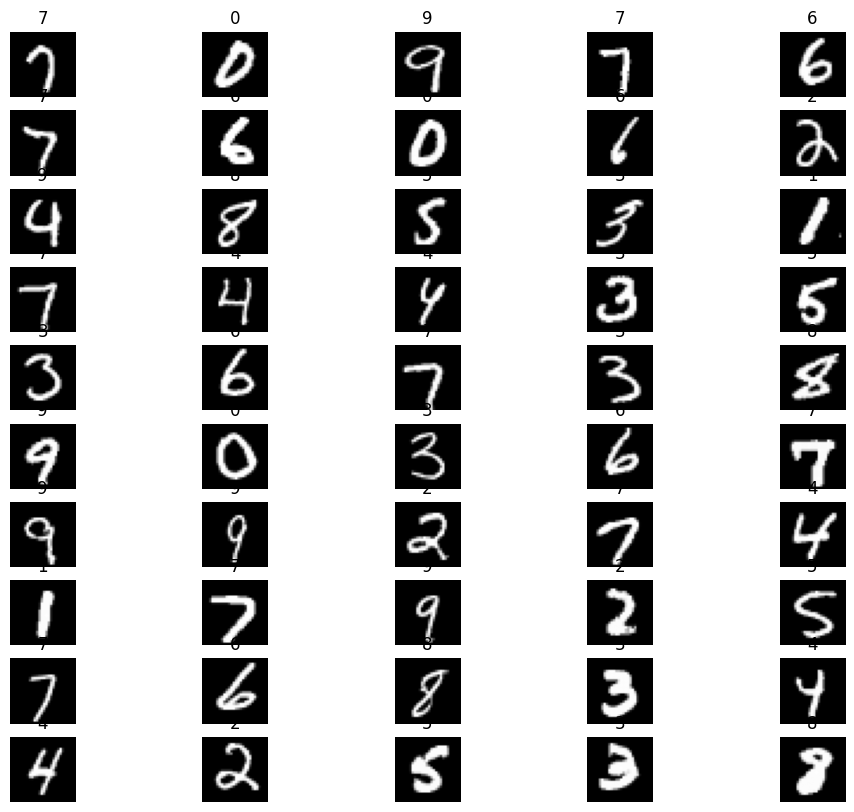

In [9]:
# Randomly picking 50 images and plotting it

figure = plt.figure(figsize=(12, 10))
cols, rows = 5, 10
for i in range(1, cols*rows+1):
  sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
  img, label = train_dataset[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

To avoid overfitting in case of large training data set , we will divide training data set into training and validation data set in 80:20 ratio

In [10]:
total_train_size = len(train_dataset)
train_size = int(0.8 * total_train_size)
val_size = total_train_size - train_size
print(f'Total train size was: {total_train_size}')
print(f'New Train size is: {train_size}, Validation size is: {val_size}')
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

Total train size was: 60000
New Train size is: 48000, Validation size is: 12000


In [11]:
#DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_ddataloader= DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Feature batch shape: torch.Size([128, 1, 28, 28])
Labels batch shape: torch.Size([128])


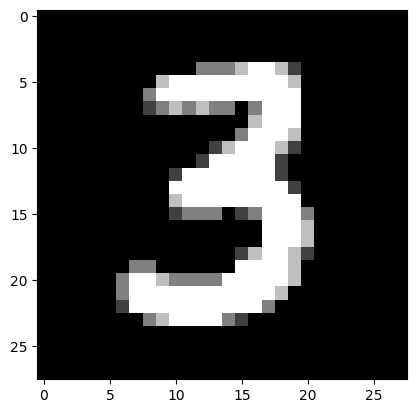

Label: 3


In [12]:
#iterating through a dataloader

#Display image and Label
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [13]:
for batch in train_dataloader:
    inputs, labels = batch  #returns batches as tuples
    print(inputs)
    print(labels)
    break

tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.424

In [18]:
#Buidling the Neural Network

# class SimpleNN(nn.Module):
#     def __init__(self, input_size, hidden_size_1, hidden_size_2, num_classes):
#         super(SimpleNN, self).__init__()
#         self.flatten = nn.Flatten()
#         self.fc1 = nn.Linear(input_size, hidden_size_1)
#         self.act1 = nn.ReLU()
#         self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)
#         self.act2 = nn.ReLU()
#         self.output = nn.Linear(hidden_size_2, num_classes)

#     def forward(self, x):
#         x = self.flatten(x)
#         out = self.fc1(x)
#         out = self.act1(out)
#         out = self.fc2(out)
#         out = self.act2(out)
#         out = self.output(out)
#         return out



class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, num_classes, dropout_rate=0.5):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()  # Add flatten layer here

        self.fc1 = nn.Linear(input_size, hidden_size_1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)   # Dropout after first layer

        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)   # Dropout after second layer

        self.fc3 = nn.Linear(hidden_size_2, num_classes)

    def forward(self, x):
        x = self.flatten(x)  # Apply flatten layer here
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.dropout1(out)  # applied only during training

        out = self.fc2(out)
        out = self.relu2(out)
        out = self.dropout2(out)

        out = self.fc3(out)
        return out

In [15]:
def predict_labels(x):
  p= torch.argmax(x, dim=1)
  return p

In [16]:
def train(model, train_Loader , vaL_Loader, lr=1e-2, patience=5, max_epochs=10,verbos=True):
  device= "cuda" if torch.cuda.is_available() else "cpu"
  print(f'started training on {device}')
  model = model.to(device)
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)
  criterion = nn.CrossEntropyLoss()

  total_train_loss = []
  total_val_loss = []
  total_train_acc = []
  total_val_acc = []

  counter=0
  best_val_loss = np.inf

  #main training loop

  for epoch in range(max_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for x,y in train_Loader:
      x = x.to(device)
      y = y.to(device)

      optimizer.zero_grad()
      outputs = model(x)
      loss_t = criterion(outputs, y)
      loss_t.backward()
      optimizer.step()

      running_loss += loss_t.item() * x.size(0)
      pred = predict_labels(outputs)
      total += y.size(0)
      correct += (pred == y).sum().item()
    train_loss = running_loss / total
    train_acc = correct / total

    model.eval()
    val_running_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
      for x, y in vaL_Loader: # Corrected variable name here
        x = x.to(device)
        y = y.to(device)
        outputs = model(x)
        loss_v = criterion(outputs, y)
        val_running_loss += loss_v.item() * x.size(0)
        pred = predict_labels(outputs)
        val_total += y.size(0)
        val_correct += (pred == y).sum().item()

    val_loss = val_running_loss / val_total
    val_acc = val_correct / val_total

    total_train_loss.append(train_loss)
    total_val_loss.append(val_loss)
    total_train_acc.append(train_acc)
    total_val_acc.append(val_acc)

    if verbos: # Corrected variable name here
      print(f'Epoch: {epoch+1}/{max_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}')

            #EarlyStopping criteria
    if val_loss < best_val_loss:
      best_val_loss = val_loss
      counter = 0
    else:
      counter += 1
      if counter >= patience:
        print(f'Early stopping at epoch {epoch+1}')
        break # Moved break here

  if verbos:
    epochs = np.arange(1, len(total_train_loss) + 1)
    plt.figure(figsize=(6, 4))
    plt.plot(epochs, total_train_loss, label='Training Loss')
    plt.plot(epochs, total_val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy Loss')
    plt.title('Loss histroy')
    plt.legend()
    plt.tight_layout()
    plt.show()

  return total_train_loss, total_val_loss, total_train_acc, total_val_acc

started training on cpu
Epoch: 1/15, Train Loss: 0.6860, Val Loss: 0.2638, Train Acc: 0.7846, Val Acc: 0.9207
Epoch: 2/15, Train Loss: 0.3748, Val Loss: 0.1885, Train Acc: 0.8951, Val Acc: 0.9432
Epoch: 3/15, Train Loss: 0.3080, Val Loss: 0.1633, Train Acc: 0.9125, Val Acc: 0.9527
Epoch: 4/15, Train Loss: 0.2748, Val Loss: 0.1482, Train Acc: 0.9231, Val Acc: 0.9557
Epoch: 5/15, Train Loss: 0.2563, Val Loss: 0.1381, Train Acc: 0.9270, Val Acc: 0.9587
Epoch: 6/15, Train Loss: 0.2422, Val Loss: 0.1288, Train Acc: 0.9316, Val Acc: 0.9623
Epoch: 7/15, Train Loss: 0.2218, Val Loss: 0.1225, Train Acc: 0.9373, Val Acc: 0.9647
Epoch: 8/15, Train Loss: 0.2162, Val Loss: 0.1196, Train Acc: 0.9385, Val Acc: 0.9645
Epoch: 9/15, Train Loss: 0.2065, Val Loss: 0.1176, Train Acc: 0.9406, Val Acc: 0.9657
Epoch: 10/15, Train Loss: 0.2017, Val Loss: 0.1165, Train Acc: 0.9421, Val Acc: 0.9663
Epoch: 11/15, Train Loss: 0.1944, Val Loss: 0.1103, Train Acc: 0.9441, Val Acc: 0.9685
Epoch: 12/15, Train Loss: 0.

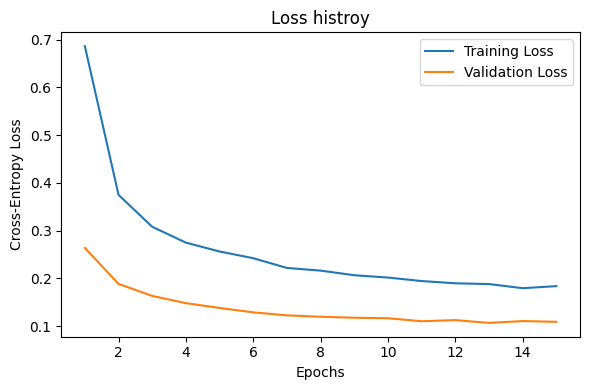

([0.6860445737044016,
  0.3747772338787715,
  0.3079742301106453,
  0.27478860948483147,
  0.25625015238920845,
  0.2422215190132459,
  0.22181998771429062,
  0.21623338103294373,
  0.2065422353943189,
  0.20167142087221146,
  0.19438577339053154,
  0.18969320566455522,
  0.18808955666422844,
  0.17945215325554212,
  0.18378696380058923],
 [0.263764276266098,
  0.18847013787428538,
  0.1632848527431488,
  0.1481509123245875,
  0.13806996577978134,
  0.1288421308994293,
  0.12253530345360437,
  0.11964554804563522,
  0.11759547154108684,
  0.11648603647947312,
  0.1103114144206047,
  0.11261242471138637,
  0.10682522386312485,
  0.11062712144851684,
  0.10905191697676976],
 [0.7846041666666667,
  0.8950833333333333,
  0.9124583333333334,
  0.9230833333333334,
  0.9269583333333333,
  0.9315833333333333,
  0.9373333333333334,
  0.9384791666666666,
  0.9405833333333333,
  0.942125,
  0.9440625,
  0.9444166666666667,
  0.94575,
  0.9475833333333333,
  0.9475],
 [0.9206666666666666,
  0.9431

In [19]:
# Instantiate the model
model = SimpleNN(input_size, hidden_size_1, hidden_size_2, num_classes)

# Train the model
train(model, train_dataloader, val_dataloader, lr=learning_rate, patience=5, max_epochs=num_epochs, verbos=True)

In [21]:
#Checking predictions
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)   #move model to specified device

# Get the first batch from the test_dataloader
test_features, test_labels = next(iter(test_ddataloader))

print(f'First batch labels:\n {test_labels}')   #true labels
with torch.no_grad():
    # Move the features to the device and get predictions
    first_batch_preds = model(test_features.to(device))
print(f'First batch predictions:\n {predict_labels(first_batch_preds)}')

First batch labels:
 tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0,
        2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4,
        1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2,
        5, 4, 7, 6, 7, 9, 0, 5])
First batch predictions:
 tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0,
        2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4,
        1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2,
        5, 4, 7, 6, 7, 9, 0, 5])


In [23]:
#accuracy
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

correct = 0
total = 0
#save these for later analyses
all_predicted = []
all_labels = []

with torch.no_grad():
    for data, labels in test_ddataloader:
        data, labels = data.to(device), labels.to(device)   #move data to device
        outputs = model(data)
        predicted = predict_labels(outputs)

        all_predicted.append(predicted)
        all_labels.append(labels)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

full_test_acc = correct / total
print(f'Test accuracy: {full_test_acc*100}%')

# Concatenate all predicted and label tensors
all_predicted = torch.cat(all_predicted)
all_labels = torch.cat(all_labels)

Test accuracy: 97.02%


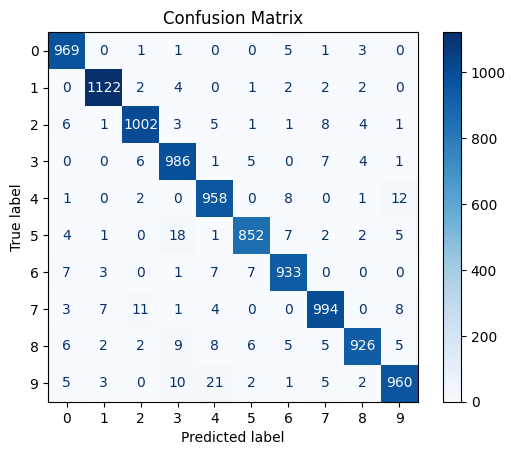

In [24]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# The predictions are on the GPU, so we need to move them to the CPU for sklearn
cm = confusion_matrix( all_labels.cpu(), all_predicted.cpu())

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()